In [71]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import os
import pickle
import xgboost as xgb
warnings.filterwarnings('ignore')

In [72]:
def savePickle(model,filename):
    dir_path="../models"
    os.makedirs(dir_path,exist_ok=True)
    pickle_file_path = os.path.join(dir_path,filename+'.pkl')
    pkl=open(pickle_file_path,'wb')
    pickle.dump(model,pkl)
    pkl.close()


In [73]:
df = pd.read_csv('../processed_data/crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,87,35,43,20.879744,82.002744,6.502985,202.935536,rice
1,63,46,39,21.770462,80.319644,7.038096,226.655537,rice
2,70,35,39,23.004459,82.320763,7.840207,263.964248,rice
3,88,41,45,26.491096,80.158363,6.980401,242.864034,rice
4,79,53,45,20.130175,81.604873,7.628473,262.717340,rice


In [74]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,92,32,30,26.774637,66.413269,6.780064,177.774507,coffee
2196,100,18,34,27.417112,56.636362,6.086922,127.924610,coffee
2197,112,25,34,24.131797,67.225123,6.362608,173.322839,coffee
2198,116,28,30,26.272418,52.127394,6.758793,127.175293,coffee
2199,98,19,27,23.603016,60.396475,6.779833,140.937041,coffee


In [75]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [76]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [77]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [78]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

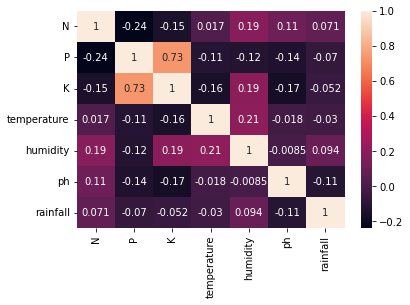

In [79]:
sns.heatmap(df.corr(),annot=True)

In [80]:
#Seperating features and target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [81]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [82]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state=2)

In [83]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  84.77272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.00      0.00      0.00        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.87      0.95      0.91        21
       mango       0.67      0.08      0.14        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00

In [84]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.91136364, 0.925     ])

In [85]:
# Saving trained Decision Tree model
savePickle(DecisionTree,"decision_tree")

In [86]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [87]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99318182, 0.99318182, 0.99090909])

In [88]:
#Saving trained Guassian Naive Bayes model
savePickle(NaiveBayes,"nb_classifier")

In [89]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [90]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98181818, 0.97272727, 0.97954545, 0.98181818, 0.97727273])

In [91]:
#Saving trained SVM model
savePickle(SVM,"SVM_classifier")

In [92]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.93      0.88      0.90        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.81      0.79      0.80        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [93]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.94090909, 0.94772727, 0.96136364, 0.97045455, 0.96590909])

In [94]:
# Saving trained Logistic Regression model
savePickle(LogReg,"logisitc_regression")

In [95]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [96]:

# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99090909, 0.99318182])

In [97]:
# Saving trained Random Forest model
savePickle(RF,"random_forest")

In [98]:
# XGBoost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain_encoded = le.fit_transform(Ytrain)
Ytest_encoded = le.fit_transform(Ytest)
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain_encoded)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest_encoded,predicted_values))

XGBoost's Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.96      0.79      0.86        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       0.95      1.00      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

In [99]:
savePickle(XB,"xgboost")

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

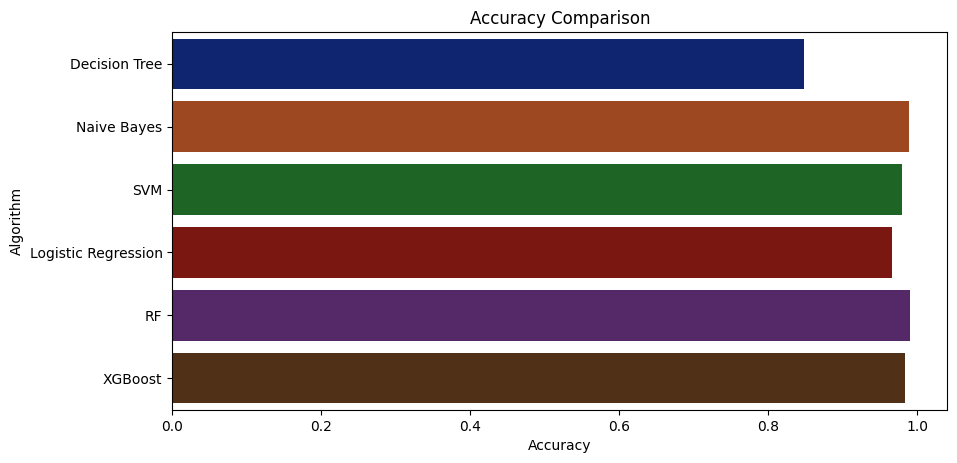

In [100]:
# Accuracy Comparison
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [101]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8477272727272728
Naive Bayes --> 0.9886363636363636
SVM --> 0.9795454545454545
Logistic Regression --> 0.9659090909090909
RF --> 0.990909090909091
XGBoost --> 0.9840909090909091


In [102]:
# 'Making a prediction
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)


['coffee']


In [103]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
